  ### Fashion MNIST in TF
  
  The "Fashion MNIST" is a dataset that contains 70,000 images in 10 categories. 60K images are for training and 10K for testing. The images contain clothing items of 28x28 pixels. 
  
  The dataset follows the patterns of the classic MNIST Digits dataset, which is why both are often used as the introduction of ML and Neural Nets for computer vision. 
  
  The code in this notebook demonstrates how to use a Dense Architecture to process the images from the MNIST Fashion Data. By visual inspection, we can immediately notice that the Fashion Data is more more challenging than the MNIST Digits. 
  
  Both datasets are of a size sufficiently large as to provide a good testing ground for some NeuralNet architectures and related algos. 

In [1]:

from __future__ import absolute_import, division, print_function

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

def print_versions() :
    print ("TF Version     ", tf.__version__)
    print ("TF Path        ", tf.__path__[0])
    # print("Keras Version   ", keras.__version__ ) # keras version is part of tf now 
    print("numpy version   ", np.__version__)
    print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Trust but Verify
print_versions()


2025-01-31 19:42:29.600098: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738370549.615393   26176 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738370549.618844   26176 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-31 19:42:29.634148: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TF Version      2.18.0
TF Path         /drv3/hm3/code/python/tf2.18/tf2.18/lib/python3.12/site-packages/keras/api/_v2
numpy version    1.26.4
Num GPUs Available:  1


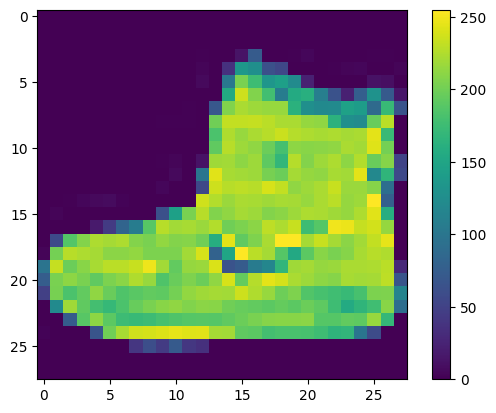

In [2]:

# get the data and explore it
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape # (60000, 28, 28)
len(train_labels)  # 10000

# Each label in train_labels is an integer between 0 and 9:
train_labels

# test_images is a (10000, 28, 28)  shape 
test_images.shape

# visually inspect first train_image (looks like a green shoe)
plt.figure()
plt.imshow(train_images[0]) 
plt.colorbar()
plt.grid(False)
plt.show()

  ### Normalizing the data
  
  The items in train_images and test_images are of type int in the range [0...255].

  Those values must be normalized as [0.0...1.0] otherwise tf will not work. 
  
  Note that using the float 255.0 in python ensures that all values in the arrays become floats

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0


  ## Visual inspection of the data
  
  The code below displays the first 25 images from the training set as a cool table of 5x5 cells. 
  
  The code also displays the class name below each image (how cool
  is that !). 
  
  Once we verified that the data is in the correct format we can 
  proceed to build and train a network.

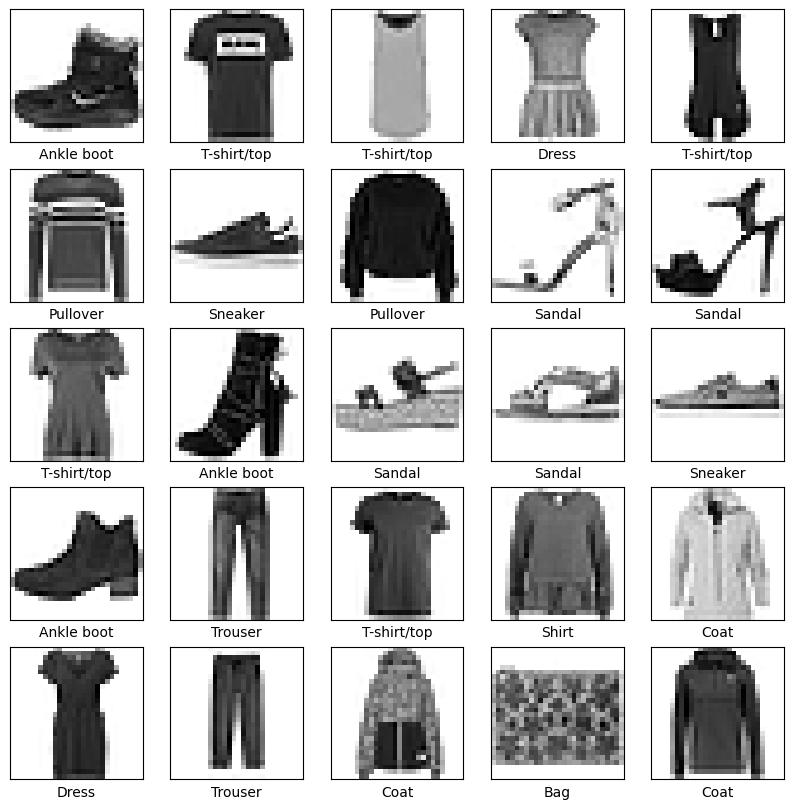

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) 
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Dense Model

  The first layer, flatten, transforms each image from a 2D array of 28x28 pixels, 
  into a 1D array of 28*28=784 pixels. 
  
  This layer unstacks rows of pixels in the image and lines them up. 
  
  The layer has no parameters to learn; it only reformats
  the data. 
  
  The next two layers are Dense, ii.e., the both are fully-connected. 
  
  Layer 2 has 128 units and layer 3 is a 10-node softmax that returns an array of 10 probability
  scores that sum up to 1.0. Each node in that layer contains the probability that
  the current image belongs to one of the 10 classes.

  Processing time at each epoch is about 6s, which is fater than the ConvNet version.
  
  Test Accuracy = 0.8650000095367432

 ## This is the model
``` 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

```

In [5]:
# model V1 defined here
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

print("Model Total Params = ", model.summary())

/drv3/hm3/code/python/tf2.18/tf2.18/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1738370706.539253   26176 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9394 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:08:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Model Total Params =  None


In [6]:
# Model V2 with an extra layer, did not improve accuracy:
model_v2 = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
      ])

model_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

print("Model Total Params = ", model_v2.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Model Total Params =  None


## Preparation for Training

  Before model is trained, the following settings needed: 

  1. Loss function: measures model accuracy during training. We wish to minimize
     this function to "steer" the model into the right direction.

  2. Optimizer: This is a method that will be used to update the model based on
     the loss function and the data that it sees. Preliminary results using original
     model:
```
     learning_rate = 0.1   => accuracy   = 0.30   (original model)
     learning_rate = 0.01  => accuracy  = 0.84   (original model)
     learning_rate = 0.005 => accuracy  = 0.86   (modifled model)
     learning_rate = 0.005 => accuracy  = 0.9170 (original model)

      Original Model:
      model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
      ])

      Modified Model below, with an extra layer, did not improve accuracy:
      model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
      ])
```

  3. Metrics: These are parameters collected during training, used to 
     monitor the training and testing steps. In this case the metric 
     is accuracy, or the fraction of the images that are correctly classified.


## Training the Model

  Train the model using n epochs.
  
  An epoch is the number of times the model is trained with the data. 
  
  Using Juanbuntu and Lenovo x250, the training took about 7 secods per epoch.
  
  When training completes, the average accuracy for all epochs was 0.3.
  
  In previous runs I said that the accuracy was 0.87, so I need to check what happened.
  
  It lookks like all things equal, by reducing the learning_rate to 0.01 the model accuracy
  is about 0.87    

Epoch 1/10


I0000 00:00:1738370780.437380   26425 service.cc:148] XLA service 0x707654009200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738370780.437417   26425 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-01-31 19:46:20.453012: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738370780.503178   26425 cuda_dnn.cc:529] Loaded cuDNN version 90501


  97/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5895 - loss: 1.3559

I0000 00:00:1738370781.531866   26425 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7838 - loss: 0.6225
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 937us/step - accuracy: 0.8557 - loss: 0.3991
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8691 - loss: 0.3581
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8787 - loss: 0.3375  
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accuracy: 0.8818 - loss: 0.3238
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 927us/step - accuracy: 0.8863 - loss: 0.3166
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8875 - loss: 0.3058  
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.8888 - loss: 0.2999
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8879 - loss: 0.2993
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.8936 - loss: 0.2883
START PERFORMANCE PLOT


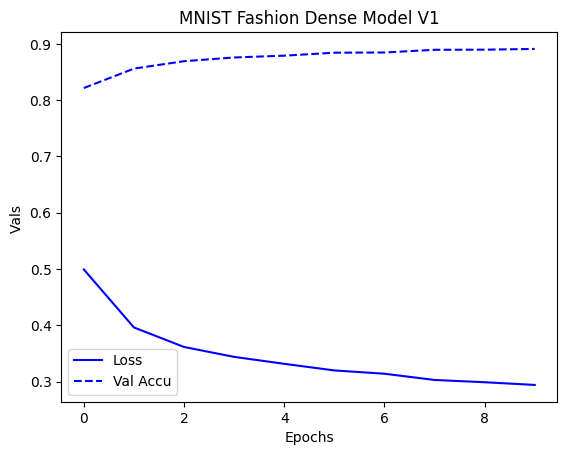

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8694 - loss: 0.3987
Test accuracy: 0.870199978351593


In [6]:

num_epochs = 10
history = model.fit(train_images, train_labels, epochs=num_epochs)
val_acc = history.history["accuracy"]
# val_loss = history.history["val_loss"]
loss = history.history["loss"]

print("START PERFORMANCE PLOT")

epochs = range(0,num_epochs)
plt.plot( epochs, loss,  "b-",     label="Loss")
plt.plot( epochs, val_acc, "b--",  label="Val Accu")

plt.title("MNIST Fashion Dense Model V1")
plt.xlabel("Epochs")
plt.ylabel("Vals ")
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


  ### Testing
  
  Once the model is trained it can be used to make predictions. 
  
  A prediction  is an array of n numbers (10 in this case). 
  
  The numbers are the confidence the model has that a given image belongs to a class C. 
  
  The higher number returned is the one that the model believes is the best fit for the image given. 

In [7]:

predictions = model.predict(test_images)
predictions[0]  # what are the fits for the first image?
predictions[19] # what are the fits for the 20th image?

# a nice format to return predictions
print ("Image 00 is a ", class_names[np.argmax(predictions[0])])
print ("Image 19 is a ", class_names[np.argmax(predictions[19])])


# a nicer format to report the first 25 predictions
for i in range(25):
    print ("Model believes that image ", i, " is a ", class_names[np.argmax(predictions[i])])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Image 00 is a  Ankle boot
Image 19 is a  T-shirt/top
Model believes that image  0  is a  Ankle boot
Model believes that image  1  is a  Pullover
Model believes that image  2  is a  Trouser
Model believes that image  3  is a  Trouser
Model believes that image  4  is a  T-shirt/top
Model believes that image  5  is a  Trouser
Model believes that image  6  is a  Coat
Model believes that image  7  is a  Shirt
Model believes that image  8  is a  Sandal
Model believes that image  9  is a  Sneaker
Model believes that image  10  is a  Coat
Model believes that image  11  is a  Sandal
Model believes that image  12  is a  Sandal
Model believes that image  13  is a  Dress
Model believes that image  14  is a  Coat
Model believes that image  15  is a  Trouser
Model believes that image  16  is a  Pullover
Model believes that image  17  is a  Pullover
Model believes that image  18  is a  Bag
Model believes that image  19  is a  T-shirt/top
Model believes that im

  ### Test and Verify
  
  If we go through the trouble of verifying the prediction results versus the actual images, we would have to conclude that the predictions don't seem to be so good... 
  
  The code below shows how to create a pair {image, prediction} for each of the samples.
  
  The  pairs are displayed as a table 5x3 table. 

In [8]:

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
    

In [9]:

# display predictions. Blue bar shows correct prediction. Red shows incorrect
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red') # incorrect prediction
    thisplot[true_label].set_color('blue') # correct prediction

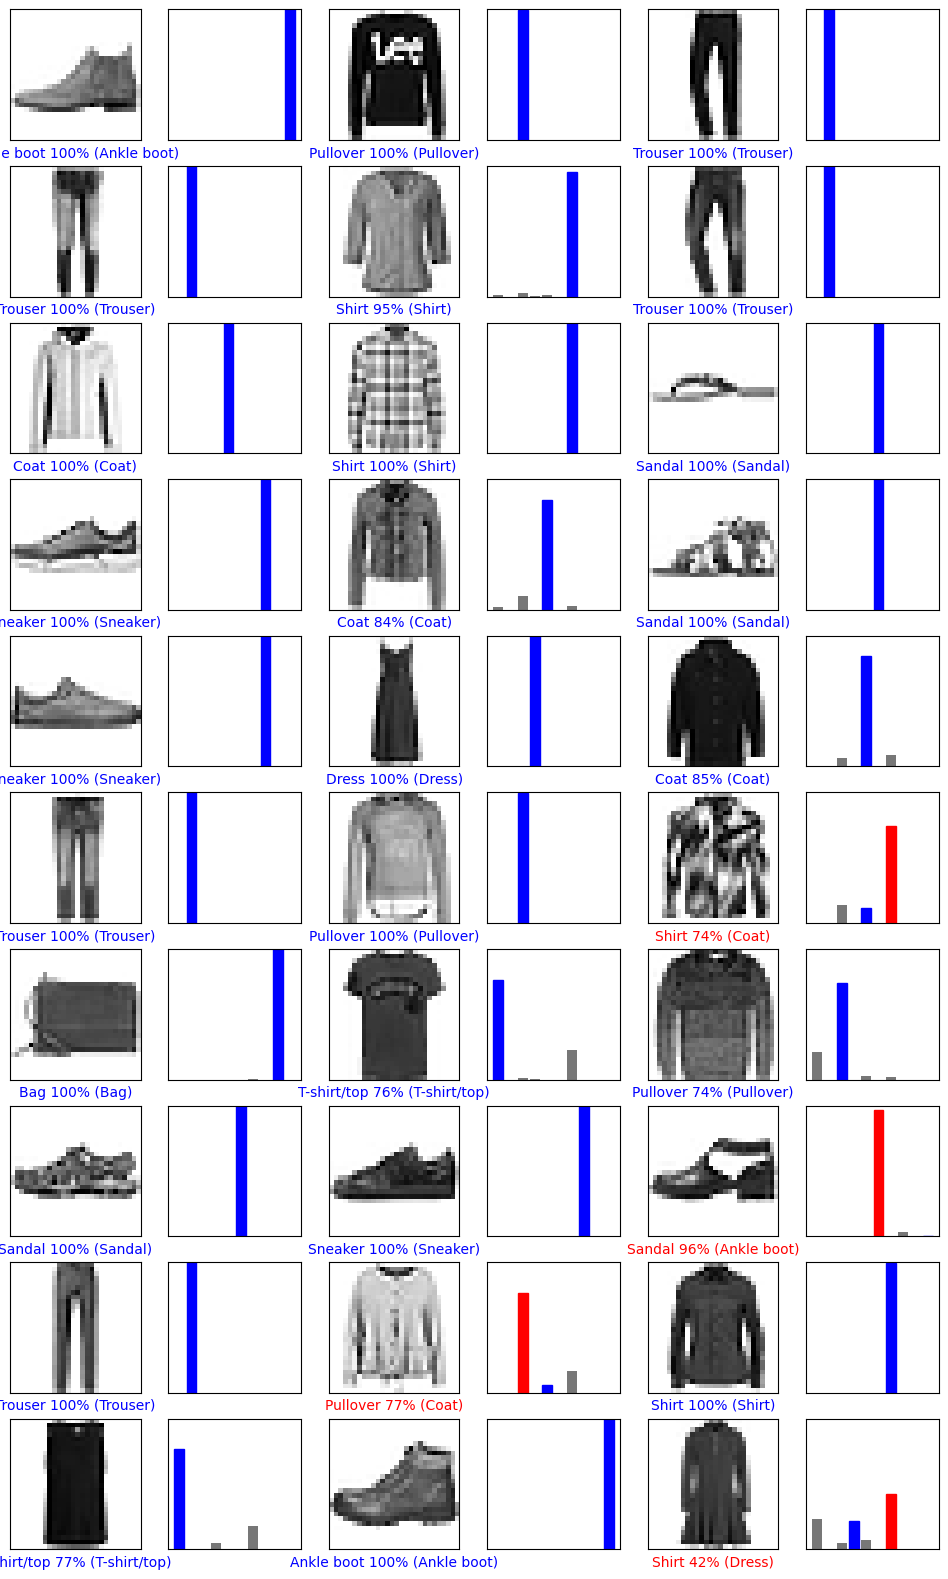

In [11]:

# Plot the first 30 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
[[4.7490035e-16 2.3594434e-17 4.1269014e-17 1.3695579e-17 3.1282140e-23
  1.1564314e-05 1.3262056e-18 5.4005845e-03 1.8842433e-17 9.9458790e-01]]


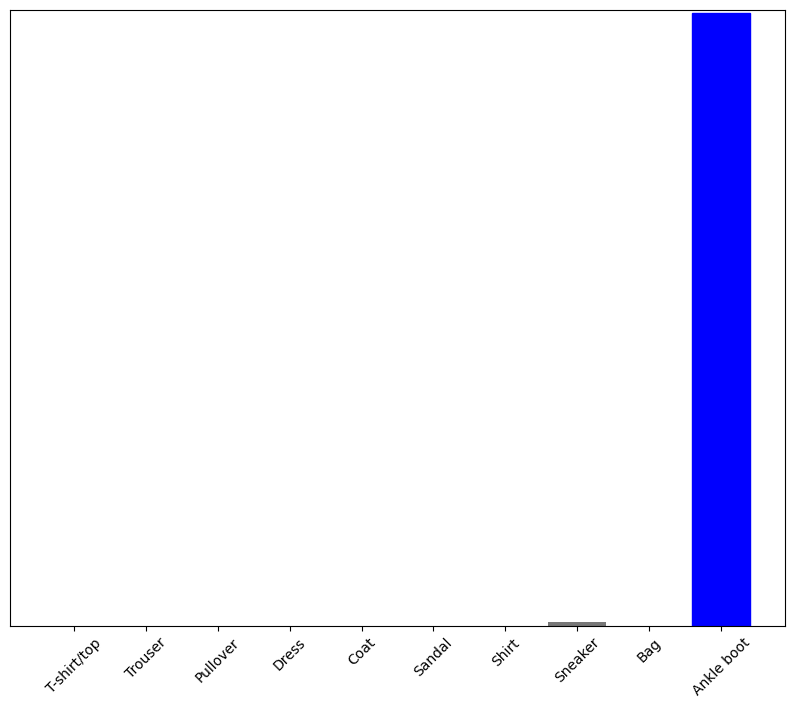

In [10]:

# to display the prediction for a single sample:

# Add the image to a batch where it's the only member.
# Grab an image from the test dataset
img = test_images[0]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)

# now predict for that image
predictions_single = model.predict(img)
print(predictions_single)

#display prediction
plt.figure(figsize=(10,8))
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

